In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# DataSet

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [27]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
# PassengerId has unique values
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

# Data Exploration

In [31]:
continuous_features = ['Age','Fare']
categorical_features = ['Pclass','Sex','SibSp','Parch','Embarked','Survived']

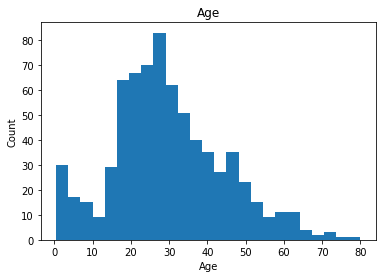

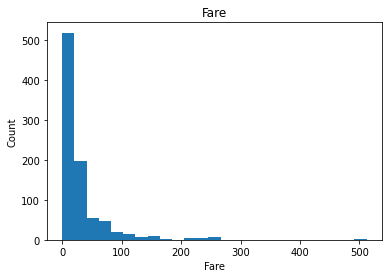

In [53]:
for feature in continuous_features:
    plt.hist(train[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

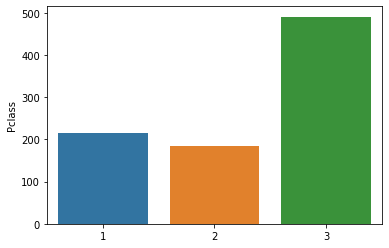

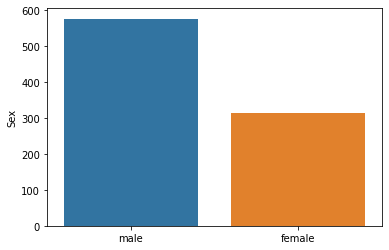

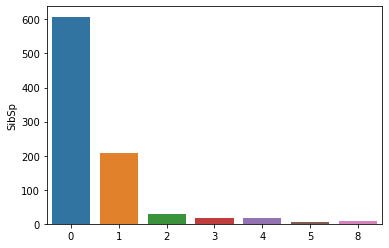

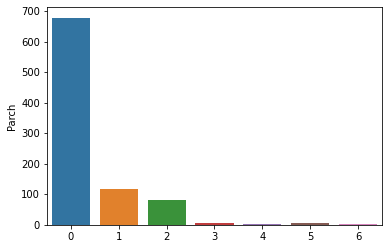

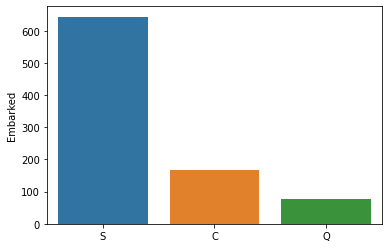

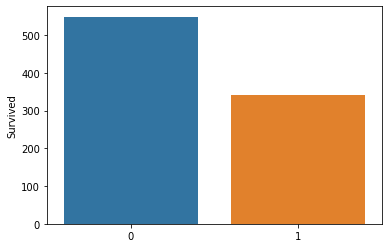

In [33]:
for feature in categorical_features:
    sns.barplot(x=train[feature].value_counts().index,y=train[feature].value_counts())
    plt.show()

# Handle Numeric Data

In [34]:
train['label'] = 1
test['label'] = 0

In [54]:
data = pd.concat((train,test),axis=0,ignore_index=True).copy()
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,label
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [55]:
# apply log transform on Fare feature to minimize the skewness
data['Fare'] = data['Fare'].apply(lambda x: np.log(x+1))

<AxesSubplot:>

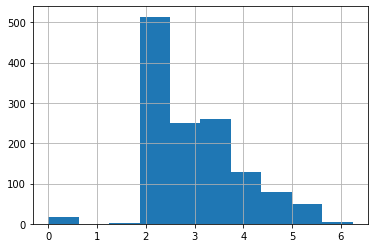

In [56]:
data['Fare'].hist()

# Handle Missing Values

In [57]:
# filling the null values with mean and median values
data['Age'] = data['Age'].fillna(train['Age'].mean())
data['Fare'] = data['Fare'].fillna(train['Fare'].median())

In [58]:
data.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       2
label          0
dtype: int64

In [59]:
data.dropna(subset=['Embarked'],inplace=True)

# Feature Engineering

In [60]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,label
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S,1


In [61]:
# Extracting name_title from the name feature
data['name_title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [62]:
# deriving numeric tickets
data['numeric_tickets'] = data['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)

In [64]:
# extracting the count of cabins for each passenger
data['cabin_multiple'] = data['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [66]:
data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [132]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label,name_title,numeric_tickets,cabin_multiple
0,0.0,3,male,22.0,1,0,2.110213,S,1,Mr,0,0
1,1.0,1,female,38.0,1,0,4.280593,C,1,Mrs,0,1
2,1.0,3,female,26.0,0,0,2.188856,S,1,Miss,0,0
3,1.0,1,female,35.0,1,0,3.990834,S,1,Mrs,1,1
4,0.0,3,male,35.0,0,0,2.202765,S,1,Mr,1,0


## Handling Categorical Features

In [133]:
data_mod = data.copy()

In [134]:
data_mod['name_title'].value_counts()

Mr              757
Miss            259
Mrs             196
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
the Countess      1
Jonkheer          1
Dona              1
Capt              1
Mme               1
Sir               1
Don               1
Lady              1
Name: name_title, dtype: int64

In [135]:
# one hot encoding the most frequent name title labels
name_labels = ['Mr','Miss','Mrs','Master']
for label in  name_labels:
    data_mod[label] = np.where(data_mod['name_title']==label,1,0)
data_mod.drop('name_title',axis=1,inplace=True)

In [136]:
# One hot encoding the most frequent labels in Parch feature
data_mod['Parch_0'] = np.where(data_mod['Parch']==0,1,0)
data_mod['Parch_1'] = np.where(data_mod['Parch']==1,1,0)
data_mod['Parch_2'] = np.where(data_mod['Parch']==2,1,0)
data_mod.drop('Parch',axis=1,inplace=True)

In [137]:
# One hot encoding the most frequent labels in SibSp feature
data_mod['SibSp_0'] = np.where(data_mod['SibSp']==0,1,0)
data_mod['SibSp_1'] = np.where(data_mod['SibSp']==1,1,0)
data_mod.drop('SibSp',axis=1,inplace=True)

In [139]:
# One hot encoding the most frequent labels in cabin_multiple feature
data_mod['cabin'] = np.where(data_mod['cabin_multiple']==0,1,0)
data_mod.drop('cabin_multiple',axis=1,inplace=True)

In [140]:
data_mod.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,label,numeric_tickets,Mr,Miss,Mrs,Master,Parch_0,Parch_1,Parch_2,SibSp_0,SibSp_1,cabin
0,0.0,3,male,22.0,2.110213,S,1,0,1,0,0,0,1,0,0,0,1,1
1,1.0,1,female,38.0,4.280593,C,1,0,0,0,1,0,1,0,0,0,1,0
2,1.0,3,female,26.0,2.188856,S,1,0,0,1,0,0,1,0,0,1,0,1
3,1.0,1,female,35.0,3.990834,S,1,1,0,0,1,0,1,0,0,0,1,0
4,0.0,3,male,35.0,2.202765,S,1,1,1,0,0,0,1,0,0,1,0,1


In [141]:
df = data_mod.copy()

In [143]:
df['Pclass'] = df['Pclass'].astype('O')

In [146]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Survived,Age,Fare,label,numeric_tickets,Mr,Miss,Mrs,Master,Parch_0,Parch_1,Parch_2,SibSp_0,SibSp_1,cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,2.110213,1,0,1,0,0,0,1,0,0,0,1,1,0,1,1,0,1
1,1.0,38.0,4.280593,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,1.0,26.0,2.188856,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1
3,1.0,35.0,3.990834,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
4,0.0,35.0,2.202765,1,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1


In [147]:
xtrain = df[df['label']==1].drop(['Survived','label'],axis=1).copy()
ytrain = df[df['label']==1]['Survived'].copy()
xtest = df[df['label']==0].drop(['Survived','label'],axis=1).copy()

In [157]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scale = xtrain.copy()
xtest_scale = xtest.copy()

xtrain_scale = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest_scale = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

# Feature Selection

In [158]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression

In [160]:
xtrain_scale.head()

,Age,Fare,numeric_tickets,Mr,Miss,Mrs,Master,Parch_0,Parch_1,Parch_2,SibSp_0,SibSp_1,cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.590495,-0.877591,-1.692695,0.848255,-0.505618,-0.402606,-0.217058,0.561328,-0.391213,-0.314464,-1.463333,1.803771,0.542247,-0.510875,0.900328,0.735342,-0.307941,0.616794
1,0.643971,1.366380,-1.692695,-1.178891,-0.505618,2.483819,-0.217058,0.561328,-0.391213,-0.314464,-1.463333,1.803771,-1.844177,-0.510875,-1.110706,-1.359911,-0.307941,-1.621287
2,-0.281878,-0.796281,-1.692695,-1.178891,1.977777,-0.402606,-0.217058,0.561328,-0.391213,-0.314464,0.683372,-0.554394,0.542247,-0.510875,0.900328,-1.359911,-0.307941,0.616794
3,0.412509,1.066796,0.590774,-1.178891,-0.505618,2.483819,-0.217058,0.561328,-0.391213,-0.314464,-1.463333,1.803771,-1.844177,-0.510875,-1.110706,-1.359911,-0.307941,0.616794
4,0.412509,-0.781901,0.590774,0.848255,-0.505618,-0.402606,-0.217058,0.561328,-0.391213,-0.314464,0.683372,-0.554394,0.542247,-0.510875,0.900328,0.735342,-0.307941,0.616794


In [161]:
fs = SelectKBest(score_func=f_regression,k=10)
fs.fit(xtrain_scale,ytrain)

SelectKBest(score_func=<function f_regression at 0x7f2a98e559e0>)

In [162]:
df1 = pd.DataFrame(np.vstack((xtrain_scale.columns,fs.scores_))).T.sort_values(by=1,ascending=False)
xtrain_fs = xtrain_scale[df1.iloc[:10,0].values]
xtest_fs = xtest_scale[df1.iloc[:10,0].values]

# Model Building

In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [167]:
gnb = GaussianNB()
cv = cross_val_score(gnb,xtrain_fs,ytrain,cv=5)
print(cv)
print(cv.mean())

[0.78089888 0.79775281 0.79213483 0.78089888 0.79096045]
0.7885291690471657


In [168]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,xtrain_fs,ytrain,cv=5)
print(cv)
print(cv.mean())

[0.7752809  0.80337079 0.82022472 0.78651685 0.79096045]
0.7952707420808736


In [169]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,xtrain_fs,ytrain,cv=5)
print(cv)
print(cv.mean())

[0.78651685 0.75280899 0.84269663 0.79775281 0.81920904]
0.7997968640893798


In [170]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,xtrain_fs,ytrain,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.76966292 0.82022472 0.79213483 0.82485876]
0.8031739986034406


In [171]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,xtrain_fs,ytrain,cv=5)
print(cv)
print(cv.mean())

[0.78651685 0.75280899 0.83707865 0.78089888 0.81355932]
0.794172538564083


In [172]:
svc = SVC(probability = True)
cv = cross_val_score(svc,xtrain_fs,ytrain,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.80898876 0.80898876 0.7752809  0.84180791]
0.808811020123151


In [173]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1,use_label_encoder=False)
cv = cross_val_score(xgb,xtrain_fs,ytrain,cv=5)
print(cv)
print(cv.mean())

[08:00:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:00:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:00:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:00:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [174]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [180]:
cv = cross_val_score(voting_clf,xtrain_scale,ytrain,cv=5)
print(cv)
print(cv.mean())

[08:03:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [176]:
xtrain.to_csv('xtrain.csv')
xtest.to_csv('xtest.csv')
xtrain_scale.to_csv('xtrain_scale.csv')
xtest_scale.to_csv('xtest_scale.csv')
xtrain_fs.to_csv('xtrain_fs.csv')
xtest_fs.to_csv('xtest_fs.csv')

In [181]:
voting_clf.fit(xtrain_fs,ytrain)
ypred = voting_clf.predict(xtest_fs).astype(int)

[08:04:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [182]:
test = pd.read_csv('../input/titanic/test.csv')
basic_submission = {'PassengerId': test.PassengerId, 'Survived': ypred}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('submission.csv', index=False)